## Outlier And Its Impacts On Machine Learning

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('titanic_train.csv')
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [3]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.Age.isna().sum()

177

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

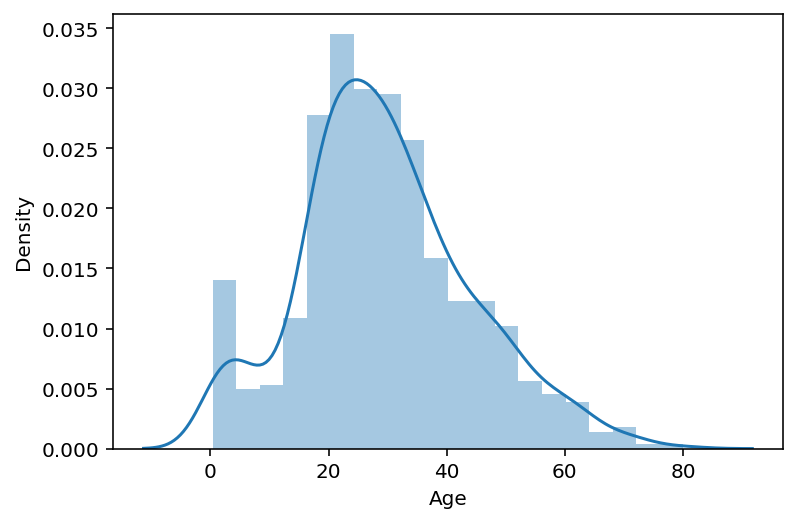

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.distplot(df.Age.dropna())

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

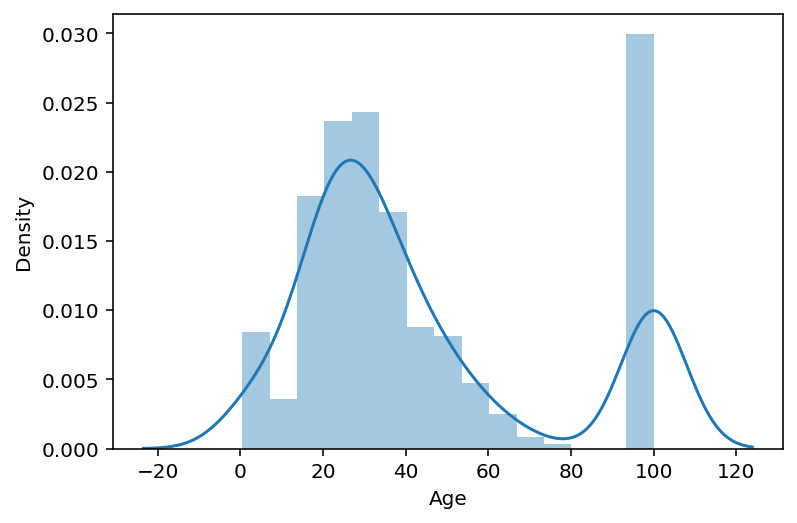

In [7]:
sns.distplot(df.Age.fillna(100))

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

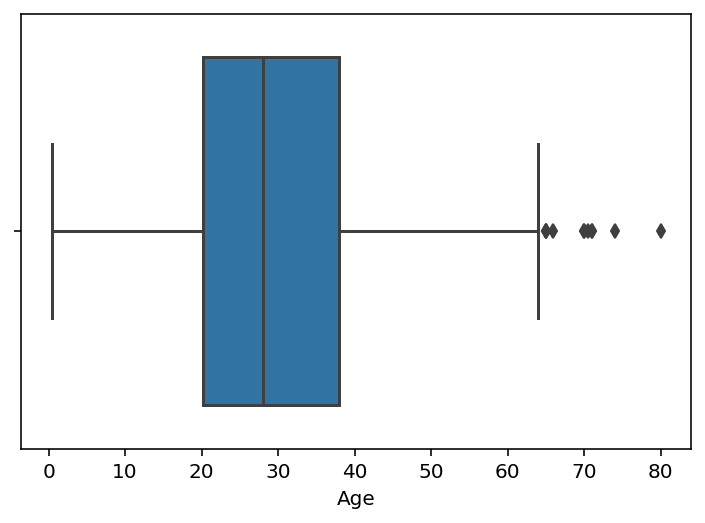

In [8]:
sns.boxplot(df.Age.dropna())

#### Gaussian Distribution

Text(0, 0.5, 'No. of passengers')

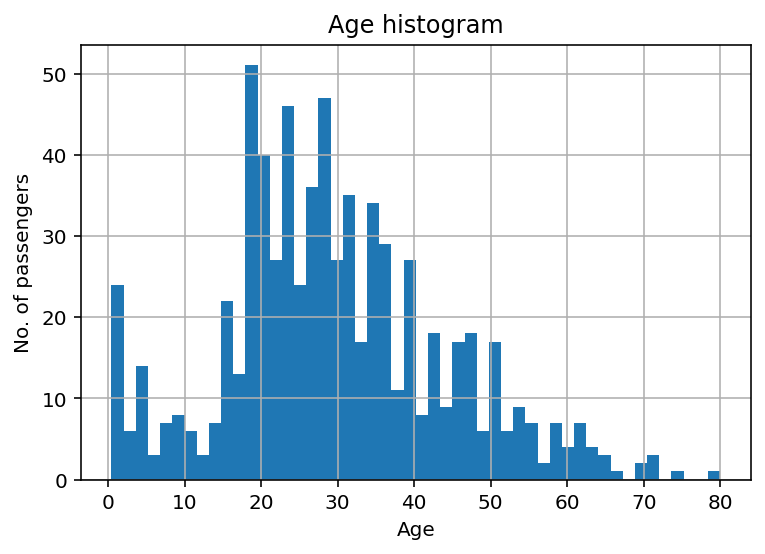

In [9]:
figure = df.Age.hist(bins=50)
figure.set_title('Age histogram')
figure.set_xlabel('Age')
figure.set_ylabel('No. of passengers')

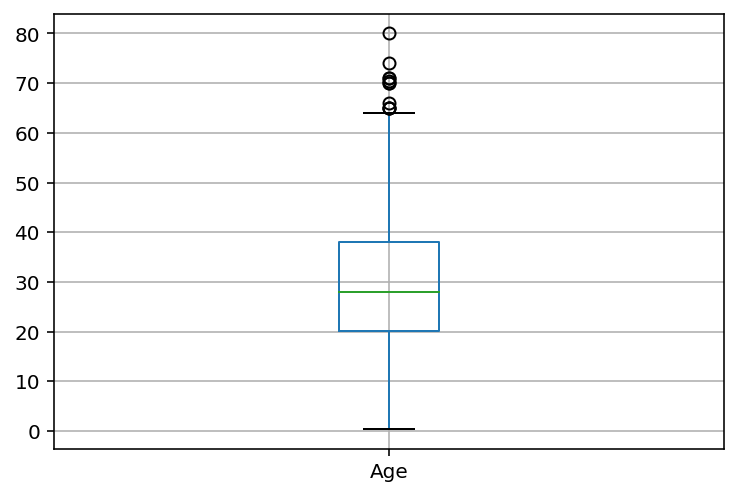

In [34]:
figure = df.boxplot(column='Age')

#### Assuming Age follows Gausian Distribution, will calculate the boundaries which differentiate the outlier

In [11]:
upper_boundary = df.Age.mean() + 3*df.Age.std()
lower_boundary = df.Age.mean() - 3*df.Age.std()
upper_boundary,lower_boundary

(73.27860964406095, -13.88037434994331)

#### Lets Compute interquantile range to calculate the boudaries IQR = diff between 75 percentile & 25 percentile

### If Feature Is Skewed

Text(0, 0.5, 'No Of Passengers')

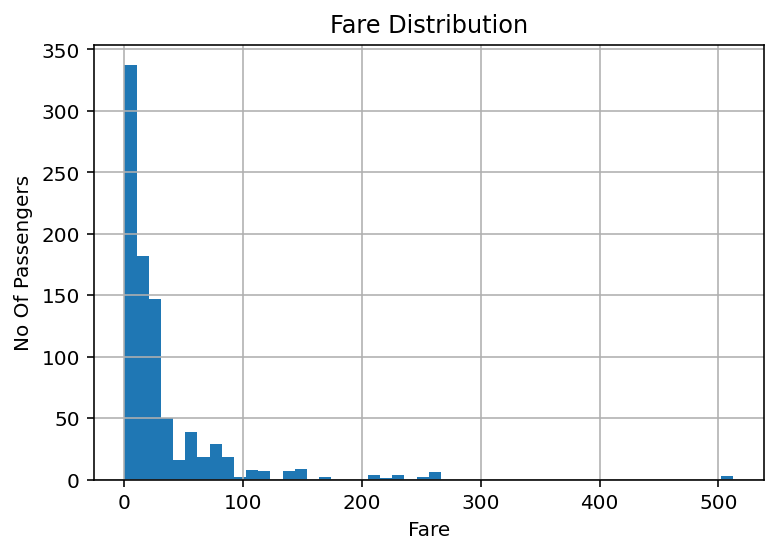

In [12]:
figure = df.Fare.hist(bins=50)
figure.set_title('Fare Distribution')
figure.set_xlabel('Fare')
figure.set_ylabel('No Of Passengers')

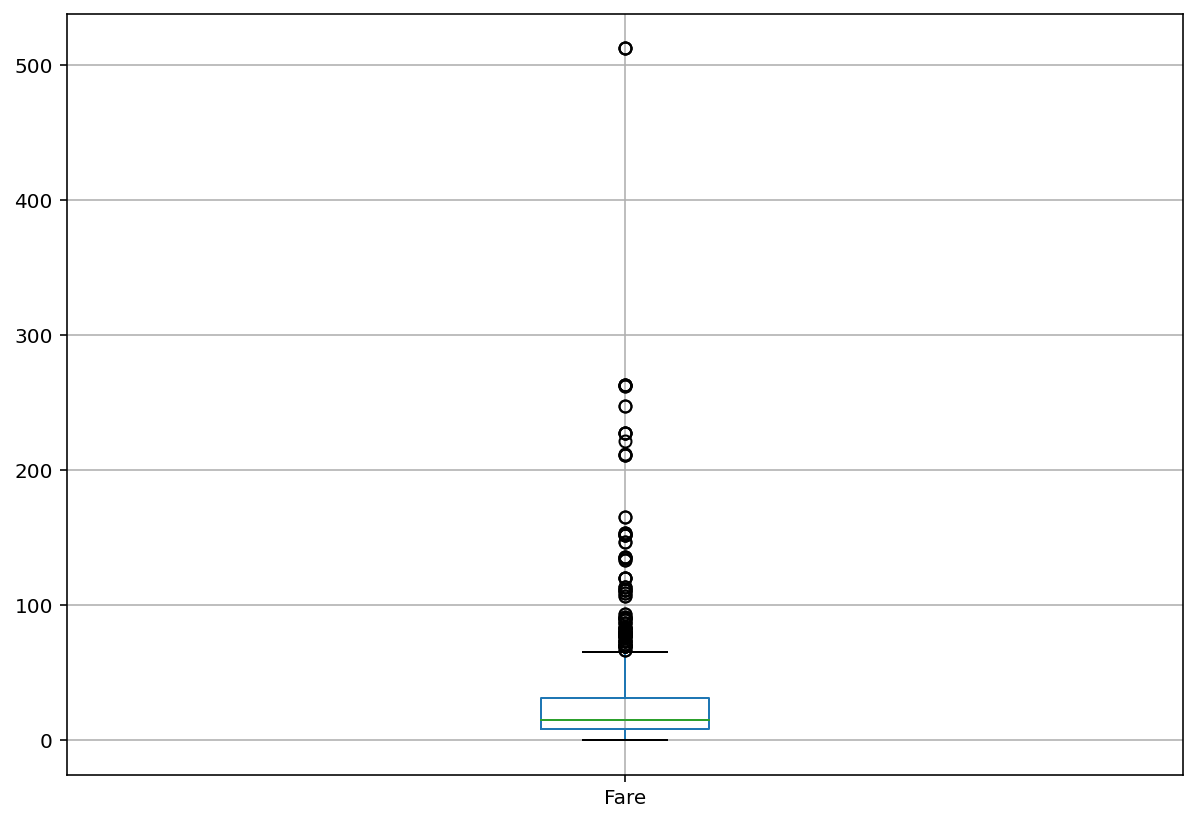

In [35]:
figure = df.boxplot(column='Fare',figsize=(10,7))

In [14]:
IQR = df.Fare.quantile(0.75)-df.Fare.quantile(0.25)
IQR

23.0896

In [15]:
lower_bridge = df.Fare.quantile(0.25)- (IQR*1.5)
upper_bride = df.Fare.quantile(0.75)+ (IQR*1.5)
lower_bridge,upper_bride

(-26.724, 65.6344)

In [16]:
# For Extreme outliers
lower_bridge = df.Fare.quantile(0.25)- (IQR*3)
upper_bride = df.Fare.quantile(0.75)+ (IQR*3)
lower_bridge,upper_bride

(-61.358399999999996, 100.2688)

In [17]:
data = df.copy()

In [18]:
data.loc[data.Age>73, 'Age'] = 73

In [19]:
data.loc[data.Fare>100, 'Fare'] = 100

Text(0, 0.5, 'No Of Passengers')

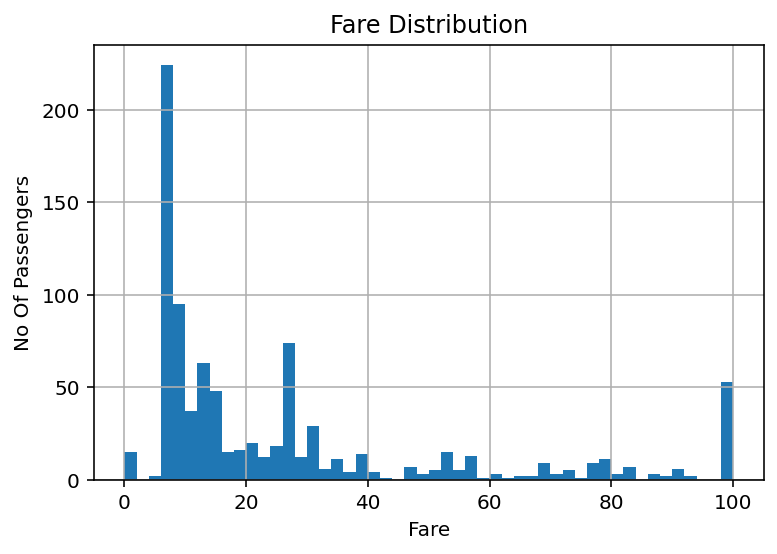

In [20]:
figure = data.Fare.hist(bins=50)
figure.set_title('Fare Distribution')
figure.set_xlabel('Fare')
figure.set_ylabel('No Of Passengers')

Text(0, 0.5, 'No. of passengers')

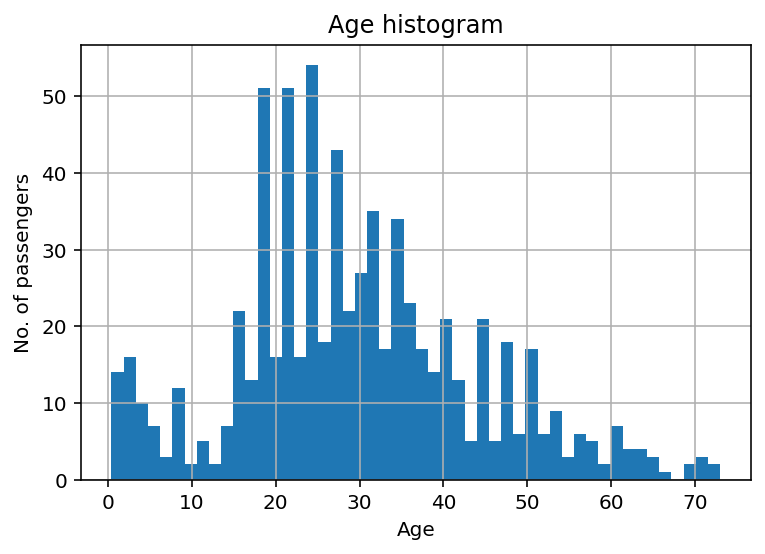

In [21]:
figure = data.Age.hist(bins=50)
figure.set_title('Age histogram')
figure.set_xlabel('Age')
figure.set_ylabel('No. of passengers')

In [38]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(data[['Age','Fare']].fillna(0), data['Survived'], test_size=0.3)

In [39]:
from sklearn.linear_model import LogisticRegression
logit = LogisticRegression()
logit.fit(x_train,y_train)
y_pred = logit.predict(x_test)
y_pred1 = logit.predict_proba(x_test)

from sklearn.metrics import roc_auc_score, accuracy_score
print("Accuracy Score:{}".format(accuracy_score(y_test,y_pred)))
print("roc_auc_score: {}".format(roc_auc_score(y_test,y_pred1[:,1])))

Accuracy Score:0.6455223880597015
roc_auc_score: 0.6584574934268186


In [40]:
# RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
classifier =  RandomForestClassifier()
classifier.fit(x_train,y_train)
y_pred = classifier.predict(x_test)
y_pred1 = classifier.predict_proba(x_test)

from sklearn.metrics import roc_auc_score, accuracy_score
print("Accuracy Score:{}".format(accuracy_score(y_test,y_pred)))
print("roc_auc_score: {}".format(roc_auc_score(y_test,y_pred1[:,1])))

Accuracy Score:0.6865671641791045
roc_auc_score: 0.6835232252410166
